In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('ToyotaCorolla - MLR.csv')
df.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


#### Perform exploratory data analysis (EDA) to gain insights into the dataset. Provide visualizations and summary statistics of the variables. Pre process the data to apply the MLR.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [4]:
df.describe()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


In [5]:
df.shape

(1436, 11)

In [6]:
df.isnull().sum()

Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

In [7]:
df.duplicated().any()

True

In [8]:
df.drop_duplicates(inplace = True)
df.shape

(1435, 11)

In [9]:
lab_enc = LabelEncoder()
df['Fuel_Type'] = lab_enc.fit_transform(df[['Fuel_Type']])
df

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,1,90,0,2000,3,4,5,1165
1,13750,23,72937,1,90,0,2000,3,4,5,1165
2,13950,24,41711,1,90,0,2000,3,4,5,1165
3,14950,26,48000,1,90,0,2000,3,4,5,1165
4,13750,30,38500,1,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,2,86,0,1300,3,4,5,1025
1432,10845,72,19000,2,86,0,1300,3,4,5,1015
1433,8500,71,17016,2,86,0,1300,3,4,5,1015
1434,7250,70,16916,2,86,0,1300,3,4,5,1015


### Split the dataset into training and testing sets (e.g., 80% training, 20% testing).

In [10]:
target = df[['Price']]
feature = df.drop('Price',axis = 1)

In [11]:
x_train, x_test, y_train, y_test = train_test_split(feature, target, train_size = 0.75, random_state = 100)

In [12]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1076, 10)
(1076, 1)
(359, 10)
(359, 1)


### Build a multiple linear regression model using the training dataset. Interpret the coefficients of the model. Build minimum of 3 different models.

In [13]:
lin_model = LinearRegression()
lin_model.fit(x_train, y_train)

LinearRegression()

In [44]:
y_pred = lin_model.predict(x_test)

In [15]:
lin_model.score(x_test,y_test)

0.8722609389806821

In [48]:
lin_model.coef_

array([[-1.24444956e+02, -1.69768422e-02,  4.69902048e+02,
         2.64283308e+01,  4.42307559e+02, -1.57418164e-02,
        -5.25213313e+00,  0.00000000e+00,  7.45158061e+02,
         1.91417115e+01]])

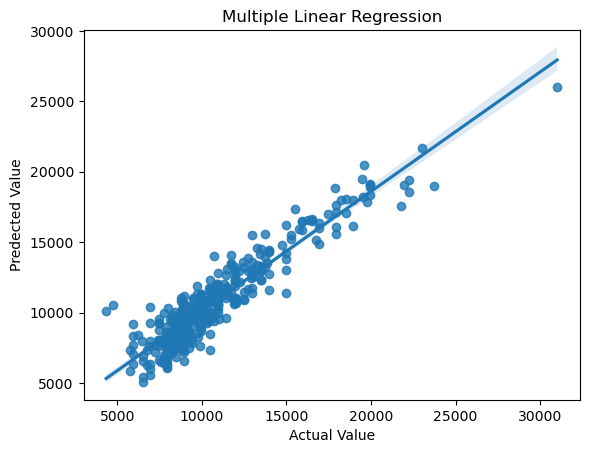

In [17]:
sns.regplot(data = df, x = y_test, y = y_pred)
plt.xlabel('Actual Value')
plt.ylabel('Predected Value')
plt.title('Multiple Linear Regression')
plt.show()

### Apply Lasso and Ridge methods on the model.

#### Lasso

In [20]:
lasso = Lasso(alpha = 1)

In [21]:
lasso.fit(x_train,y_train)

Lasso(alpha=1)

In [22]:
y_pred = lasso.predict(x_test)

In [ ]:
r2_sc = r2_score(y_test,y_pred)

In [23]:
params = {'alpha':[1,2,4,3,5,6,7,8,9,10,20,21,14]}

In [28]:
grid_search = GridSearchCV(lasso,params)

In [30]:
grid_search.fit(x_train,y_train)

GridSearchCV(estimator=Lasso(alpha=1),
             param_grid={'alpha': [1, 2, 4, 3, 5, 6, 7, 8, 9, 10, 20, 21, 14]})

In [31]:
grid_search.best_params_

{'alpha': 1}

#### Ridge

In [32]:
ridge = Ridge(alpha = 1)

In [33]:
ridge.fit(x_train,y_train)

Ridge(alpha=1)

In [37]:
y_pred = ridge.predict(x_test)

In [ ]:
r2_sc = r2_score(y_test,y_pred)

In [40]:
params1 = {'alpha':[1,2,4,3,5,6,7,8,9,10,20,21,14]}

In [41]:
grid_search = GridSearchCV(ridge,params1)

In [42]:
grid_search.fit(x_train,y_train)

GridSearchCV(estimator=Ridge(alpha=1),
             param_grid={'alpha': [1, 2, 4, 3, 5, 6, 7, 8, 9, 10, 20, 21, 14]})

In [43]:
grid_search.best_params_

{'alpha': 1}